In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import json
import csv
from pandas import DataFrame
import gc

from IPython.display import Image
from IPython.core.display import HTML

from scipy.sparse import csr_matrix

%matplotlib inline 

In [5]:
ROOT = "../data/"

with open(ROOT + "train.json") as train:
    train_data = json.load(train)
with open(ROOT + "test.json") as test:
    test_data = json.load(test)
with open(ROOT + "validation.json") as validation:
    validation_data = json.load(validation)

In [9]:
train_imgs_df = pd.DataFrame.from_records(train_data["images"])
train_imgs_df["url"] = train_imgs_df["url"]
train_labels_df = pd.DataFrame.from_records(train_data["annotations"])
#train_labels_df = train_labels_df["labelId"].apply(lambda x: [int(i) for i in x])
train_df = pd.merge(train_imgs_df,train_labels_df,on="imageId",how="outer")
train_df["imageId"] = train_df["imageId"].astype(np.int)
print(train_df.head())

   imageId                                                url  \
0        1  https://contestimg.wish.com/api/webimage/570f3...   
1        2  https://contestimg.wish.com/api/webimage/5468f...   
2        3  https://contestimg.wish.com/api/webimage/54641...   
3        4  https://contestimg.wish.com/api/webimage/550b9...   
4        5  https://contestimg.wish.com/api/webimage/54451...   

                                       labelId  
0                        [95, 66, 137, 70, 20]  
1                  [36, 66, 44, 214, 105, 133]  
2                 [170, 66, 97, 153, 105, 138]  
3                       [18, 66, 44, 153, 164]  
4  [189, 66, 176, 137, 153, 74, 181, 171, 138]  


Text(0.5,1,'Distribution of labels')

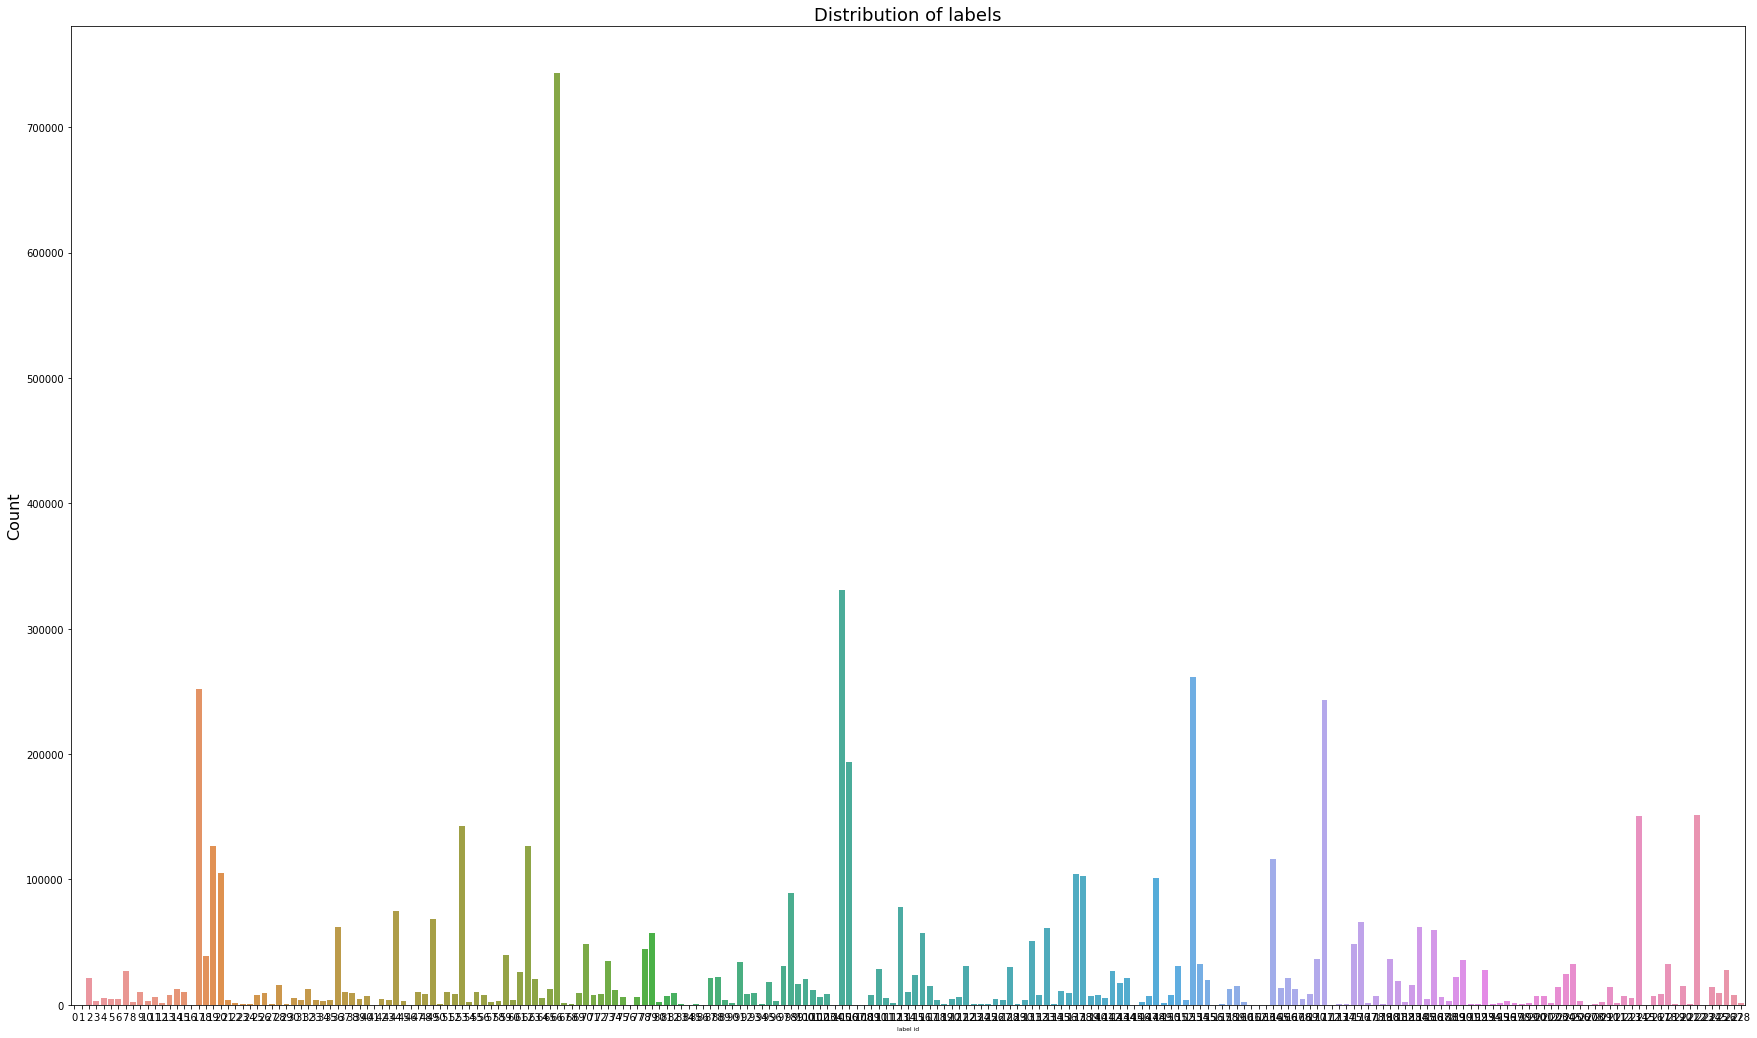

In [10]:
train_image_arr = train_df[["imageId","labelId"]].apply(lambda x: [(x["imageId"], int(i)) for i in x["labelId"]], axis=1).tolist()
train_image_arr = [item for sublist in train_image_arr for item in sublist]
train_image_row = np.array([d[0] for d in train_image_arr]).astype(np.int)
train_image_col = np.array([d[1] for d in train_image_arr]).astype(np.int)
train_image_vals = np.ones(len(train_image_col))
train_image_mat = csr_matrix((train_image_vals, (train_image_row, train_image_col)))
labels = train_image_mat.sum(0).astype(np.int)

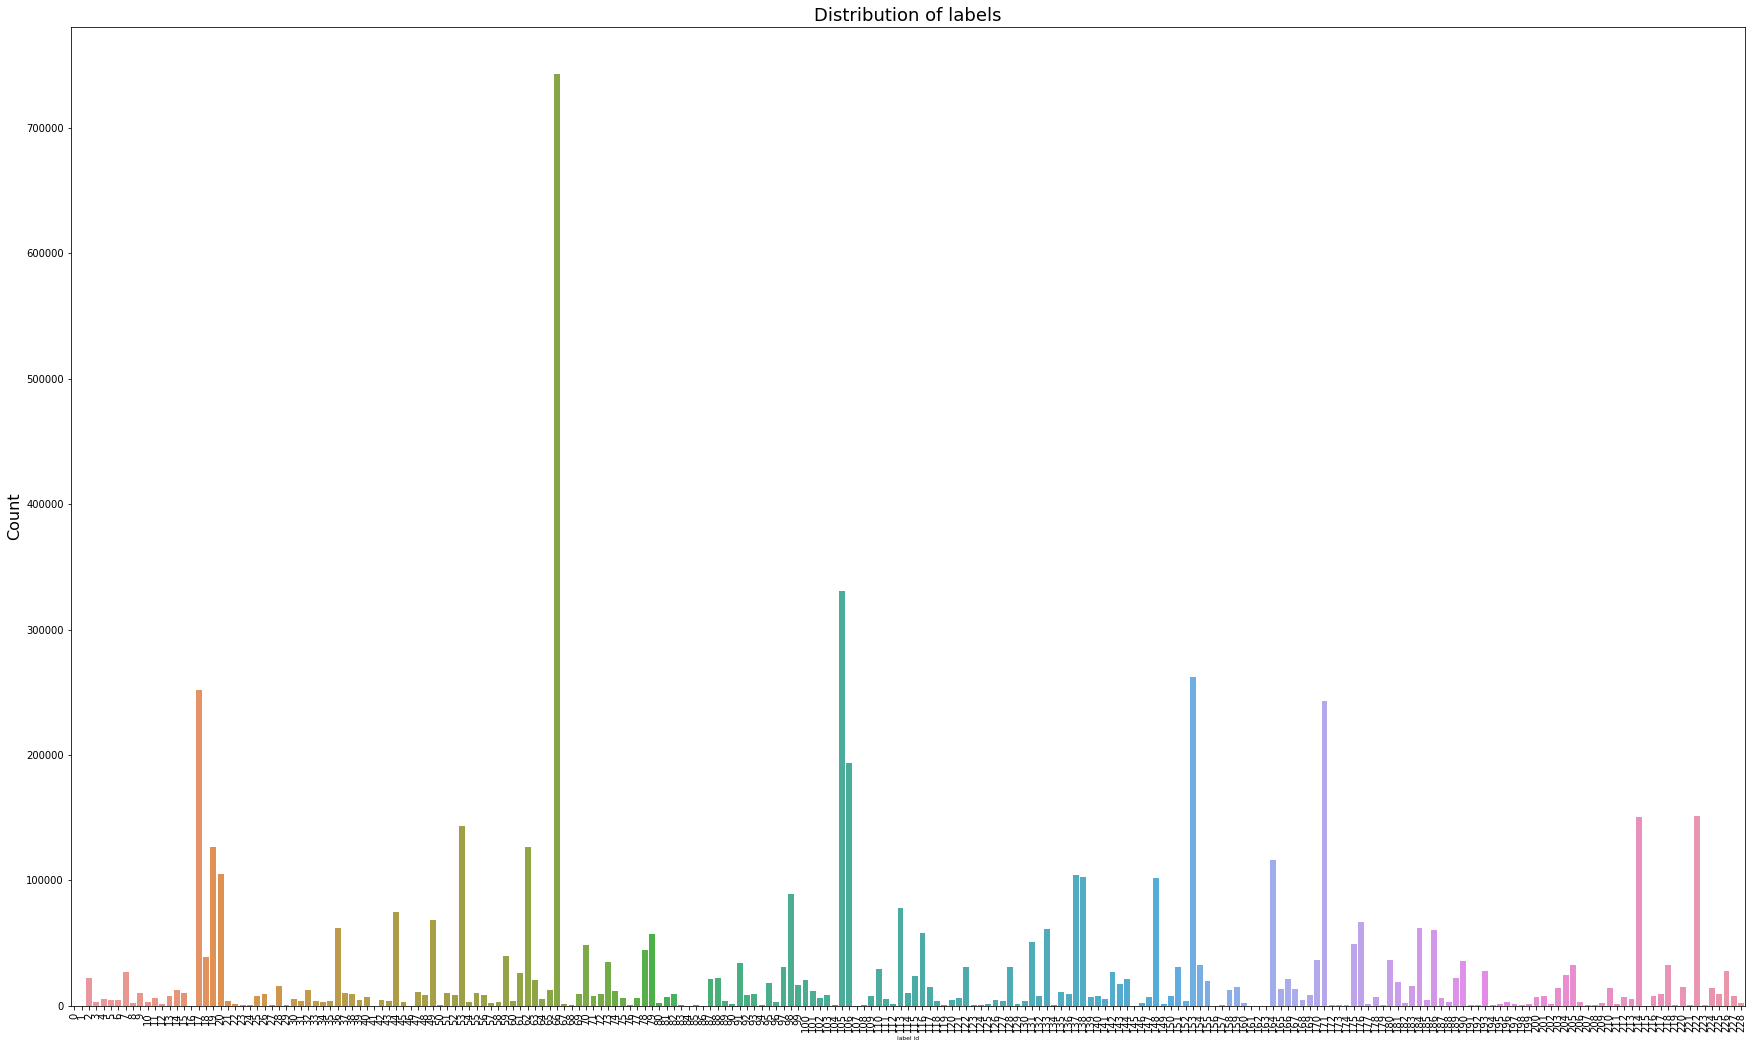

In [13]:
plt.figure(figsize=(30,18))
labels_inds = np.arange(len(labels.tolist()[0]))
sns.barplot(labels_inds,  labels.tolist()[0])
plt.xlabel('label id', fontsize=6)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=16)
plt.title("Distribution of labels", fontsize=18)